参考链接: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

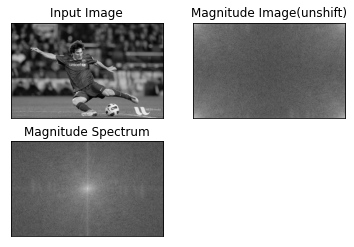

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./messi5.jpg', 0)
f = np.fft.fft2(img)  #fft2是借助FFT(快速傅里叶变换)来计算DFT(离散傅里叶变换)
fshift = np.fft.fftshift(f)  #fftshift将低频项移动到频谱图的中心,交换第一和第三象限、第二和第四象限,严格意义上讲这并不是真正的FFT,这只是一种取巧
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(20 * np.log(np.abs(f)), cmap='gray')
plt.title('Magnitude Image(unshift)')
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

In [2]:
img.shape

(342, 548)

Creating Sinusoidal Gratings using NumPy in Python
<br>
链接:https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

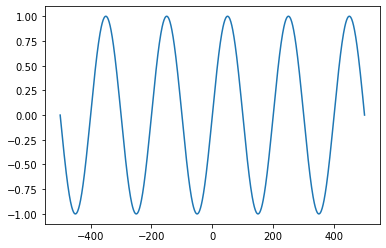

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)   #x.shape为(1001,)

wavelength = 200   # The wavelength is 200, which means that each wave will be 200 units long.
y = np.sin(2 * np.pi * x / wavelength)

plt.plot(x, y)
plt.show() #从图中发现有5个波峰(这是因为一共有1001个点,波长为200,所以使得有5个波峰)

(1001, 1001) (1001, 1001)
(1001, 1001) (1001, 1001) (1001, 1001)


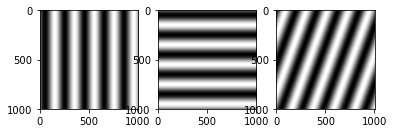

In [42]:
#把上面的那个波变成二维
from wave import Wave_read
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)   #x.shape为(1001,)

X, Y = np.meshgrid(x, x)
print(X.shape, Y.shape) #打印发现X,Y的shape都为(1001,1001)

wavelength = 200   # The wavelength is 200, which means that each wave will be 200 units long.
grating = np.sin(2 * np.pi * X / wavelength)  #X相当于将x中的每个元素都增加了1000个
another_grating = np.sin(2 * np.pi * Y / wavelength)

angle = np.pi / 9
third_grating = np.sin(
    2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
)

print(grating.shape, another_grating.shape, third_grating.shape)

plt.subplot(131)
plt.imshow(grating, cmap='gray')

plt.subplot(132)
plt.imshow(another_grating, cmap='gray')

plt.subplot(133)
plt.imshow(third_grating, cmap='gray')
plt.show()

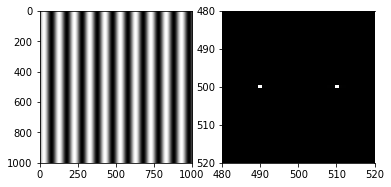

In [53]:
#进行傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100   #波长与频率成反比关系,波长越短,频率越高
angle = 0
grating = np.sin(
    2 * np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.subplot(121)
plt.imshow(grating, cmap='gray')

#做傅里叶变换
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft), cmap='gray')
plt.xlim([480,520])  #plt.xlim显示的是x轴的作图范围,注意与plt.xticks区分(后者表达的是x轴刻度内容的范围)
plt.ylim([520,480])  #之所以划定这个范围原因是原图大小是1001*1001,而图像的中心位置为(500,500),所以为了显示图像的中心位置,所以这样划分作图范围.
plt.show()   #调整波长发现,当波长变小时,两个白点的距离会变远.(白点始终是对称的)

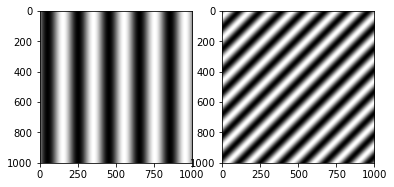

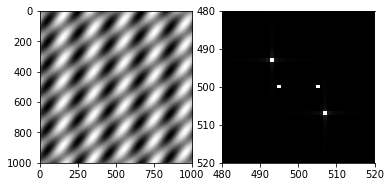

In [54]:
#进行傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 200   #波长与频率成反比关系,波长越短,频率越高
angle_1 = 0
grating_1 = np.sin(
    2 * np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength_1
)

wavelength_2 = 100   #波长与频率成反比关系,波长越短,频率越高
angle_2 = np.pi / 4
grating_2 = np.sin(
    2 * np.pi * (X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()

#将这两种不同频率的波叠加
gratings = grating_1 + grating_2

#做傅里叶变换
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()    #发现有两对对称的点,说明有两种不同大小的频率

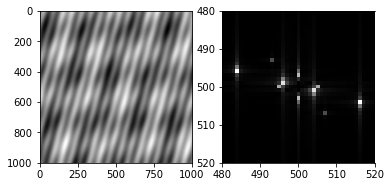

In [60]:
#更多的不同频率的波进行叠加
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / w_len
    )

#做傅里叶变换
# ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)


plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()   #

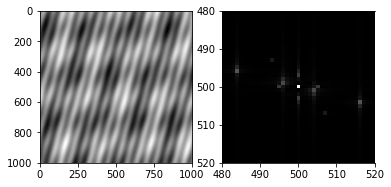

In [65]:
#更多的不同频率的波进行叠加
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / w_len
    )


#加上一个常量项
gratings += 1.25

#做傅里叶变换
# ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(gratings)
ft = np.fft.fftshift(ft)


plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480,520])  
plt.ylim([520,480])  
plt.show()   #加上一个常量时发现中心多了一个点,由此得出结论:频谱图中心点就对应常量项

#### 将真实世界中的一个图像做傅里叶变换

(301, 301)


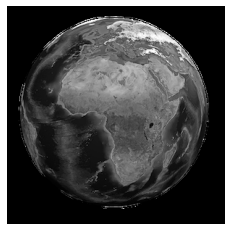

In [67]:
#这里先简化一下,将读取的图像转化为灰度图像,这样它就变成了一个二维数组,和前面的那些波图像就一样了

import matplotlib.pyplot as plt

img_filename = "./Earth.png"

image = plt.imread(img_filename)
image = image[:,:,:3].mean(axis=2) #mean(axis=2)表示在2这个维度上取平均值,经过这个操作后图像就变为了两维
print(image.shape)   #打印发现shape为(301,301)

plt.set_cmap("gray")
plt.imshow(image)
plt.axis("off")
plt.show()

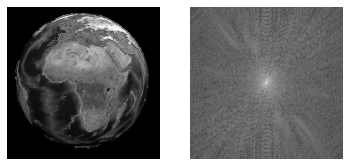

In [72]:
#对图像做2D傅里叶变换
import numpy as np
from matplotlib import pyplot as plt

def calculate_2dfft(input):
    ft = np.fft.fft2(input)
    ft = np.fft.fftshift(ft)
    return ft

#读取图像并转换为灰度图像
image_filename = './Earth.png'
image = plt.imread(img_filename)
image = image[:,:,:3].mean(axis=2)  #这个相当于将RGB对应的三个值平均化

plt.set_cmap("gray")

ft = calculate_2dfft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
#这里使用np.log的原因:为了更好的展示.如果没有它,中心点的常量项会比其他点都要亮,显示出来的效果就变成了只有中心点亮,其他点都显示为黑色
plt.imshow(np.log(abs(ft)))   #ft其实是由复数组成的,abs操作可以取该复数的模,这里复数的模相当于幅值
plt.axis("off")
plt.show()


#### 功率谱的实现
下面这幅图是1D Power Spectrum的实现,除此之外还有2D,可以参考[此链接](https://www.astrobetter.com/blog/2010/03/03/fourier-transforms-of-images-in-python/).
下面这个代码是直接照搬的这个[链接](https://github.com/cc-hpc-itwm/UpConv/blob/master/Experiments_Codes/Visualization.ipynb)来做的.

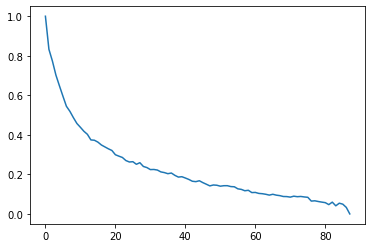

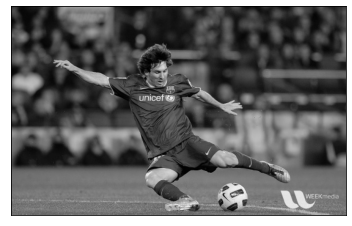

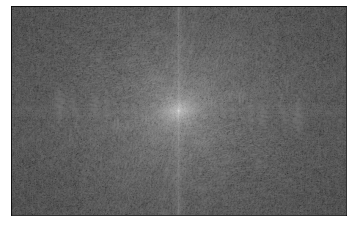

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import radialProfile
from scipy.interpolate import griddata
from PIL import Image

N = 88
epsilon = 1e-8

#real
psd1D_org = np.zeros(N)

img = cv2.imread('./messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift += epsilon
magnitude_spectrum = 20 * np.log(np.abs(fshift))

psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
points = np.linspace(0, N, num=psd1D.size)
xi = np.linspace(0, N, num=N)
interpolated = griddata(points, psd1D, xi, method='cubic')

interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
psd1D_org = interpolated

x = np.arange(0, N, 1)

plt.plot(x, psd1D_org, label='real')
plt.show()
plt.imshow(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

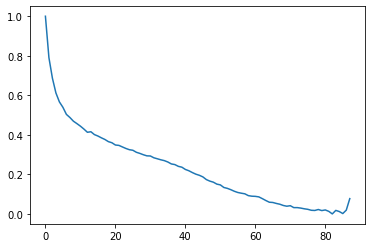

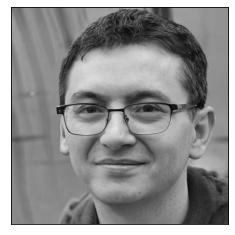

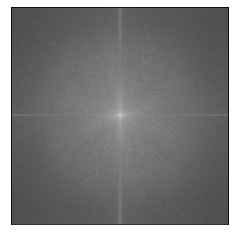

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import radialProfile
from scipy.interpolate import griddata
from PIL import Image

N = 88
epsilon = 1e-8

#real
psd1D_org = np.zeros(N)

img = cv2.imread('./image.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift += epsilon
magnitude_spectrum = 20 * np.log(np.abs(fshift))

psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
points = np.linspace(0, N, num=psd1D.size)
xi = np.linspace(0, N, num=N)
interpolated = griddata(points, psd1D, xi, method='cubic')

interpolated = (interpolated-np.min(interpolated))/(np.max(interpolated)-np.min(interpolated))
psd1D_org = interpolated

x = np.arange(0, N, 1)

plt.plot(x, psd1D_org, label='real')
plt.show()
plt.imshow(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()